In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [4]:
# input
symbol = 'HDB'
start = '2020-01-01'
end = '2021-10-11'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,62.820000,63.400002,62.730000,63.369999,61.784687,514300
2020-01-02,63.860001,64.190002,63.299999,63.700001,62.106434,1115700
2020-01-03,62.930000,63.090000,61.959999,62.009998,60.458710,1491700
2020-01-06,61.000000,61.310001,60.369999,60.910000,59.386230,2323000
2020-01-07,61.279999,61.470001,60.689999,60.689999,59.171734,1228400


In [22]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Doji,VolumePositive
0,18261.0,62.820000,63.400002,62.730000,63.369999,61.784687,514300,0,False
1,18263.0,63.860001,64.190002,63.299999,63.700001,62.106434,1115700,0,False
2,18264.0,62.930000,63.090000,61.959999,62.009998,60.458710,1491700,0,False
3,18267.0,61.000000,61.310001,60.369999,60.910000,59.386230,2323000,0,False
4,18268.0,61.279999,61.470001,60.689999,60.689999,59.171734,1228400,0,False


Text(0, 0.5, 'Price')

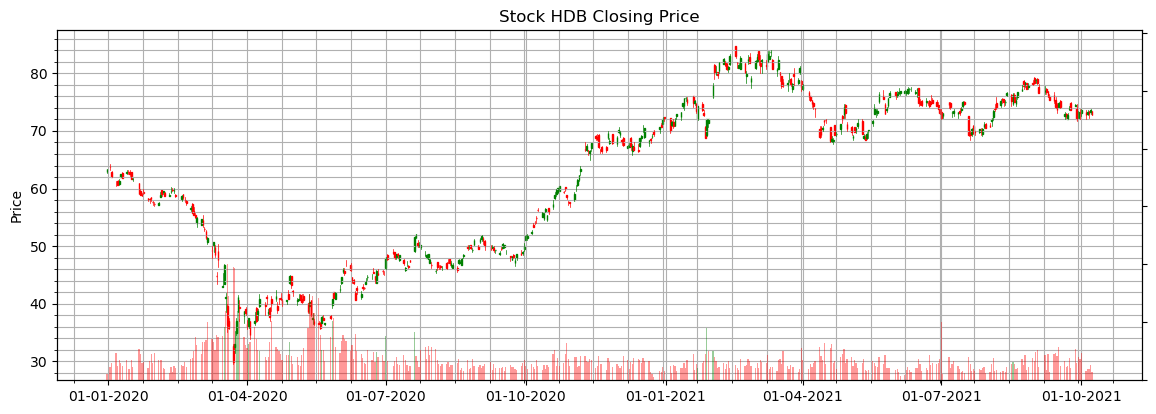

In [20]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [7]:
doji = talib.CDLDOJI(df['Open'], df['High'], df['Low'], df['Close'])

doji = doji[doji != 0]

In [8]:
df['Doji'] = talib.CDLDOJI(df['Open'], df['High'], df['Low'], df['Close'])

In [9]:
df.loc[df['Doji'] !=0]

,Open,High,Low,Close,Adj Close,Volume,Doji
Date,,,,,,,
2020-01-17,61.700001,61.860001,61.349998,61.740002,60.195465,1156100,100
2020-01-31,57.340000,57.610001,56.939999,57.279999,55.847038,2357000,100
2020-02-20,58.020000,58.459999,57.599998,57.970001,56.519779,1612600,100
2020-03-04,53.049999,53.279999,52.669998,52.980000,51.654613,3261200,100
2020-03-09,49.310001,49.990002,48.000000,49.189999,47.959427,3550100,100
2020-03-12,44.790001,45.549999,43.450001,44.750000,43.630501,3941500,100
2020-03-16,43.000000,45.430000,42.889999,43.139999,42.060780,3796000,100
2020-03-27,39.369999,40.660000,37.070000,39.310001,38.326591,5284400,100
2020-04-15,38.439999,39.150002,38.110001,38.590000,37.624603,1994300,100


In [10]:
df['Adj Close'].loc[df['Doji'] !=0]

Date
2020-01-17    60.195465
2020-01-31    55.847038
2020-02-20    56.519779
2020-03-04    51.654613
2020-03-09    47.959427
2020-03-12    43.630501
2020-03-16    42.060780
2020-03-27    38.326591
2020-04-15    37.624603
2020-04-22    39.759811
2020-04-23    39.857315
2020-04-27    39.574570
2020-05-01    41.046795
2020-05-05    39.740318
2020-06-01    41.446533
2020-06-05    46.418953
2020-06-17    41.651283
2020-06-19    43.572002
2020-06-23    44.293491
2020-06-29    44.478737
2020-06-30    44.322739
2020-07-09    47.335434
2020-07-15    45.560966
2020-07-16    45.297718
2020-07-23    48.895409
2020-07-27    47.335434
2020-07-31    45.580467
2020-08-03    44.615231
2020-08-05    45.248974
2020-08-07    45.365974
2020-08-25    48.836910
2020-09-08    48.232422
2020-09-11    48.095924
2020-09-15    48.251923
2020-09-18    47.764431
2020-10-08    53.477829
2020-10-09    54.813557
2020-10-26    57.962753
2020-10-29    56.159035
2020-11-19    64.953392
2020-12-17    68.590073
2021-01-14 

In [11]:
df['Adj Close'].loc[df['Doji'] !=0].index

DatetimeIndex(['2020-01-17', '2020-01-31', '2020-02-20', '2020-03-04',
               '2020-03-09', '2020-03-12', '2020-03-16', '2020-03-27',
               '2020-04-15', '2020-04-22', '2020-04-23', '2020-04-27',
               '2020-05-01', '2020-05-05', '2020-06-01', '2020-06-05',
               '2020-06-17', '2020-06-19', '2020-06-23', '2020-06-29',
               '2020-06-30', '2020-07-09', '2020-07-15', '2020-07-16',
               '2020-07-23', '2020-07-27', '2020-07-31', '2020-08-03',
               '2020-08-05', '2020-08-07', '2020-08-25', '2020-09-08',
               '2020-09-11', '2020-09-15', '2020-09-18', '2020-10-08',
               '2020-10-09', '2020-10-26', '2020-10-29', '2020-11-19',
               '2020-12-17', '2021-01-14', '2021-02-17', '2021-03-05',
               '2021-03-11', '2021-03-23', '2021-04-14', '2021-04-16',
               '2021-04-23', '2021-05-14', '2021-06-10', '2021-06-11',
               '2021-06-22', '2021-09-01', '2021-09-27'],
              dtype

In [12]:
doji

Date
2020-01-17    100
2020-01-31    100
2020-02-20    100
2020-03-04    100
2020-03-09    100
2020-03-12    100
2020-03-16    100
2020-03-27    100
2020-04-15    100
2020-04-22    100
2020-04-23    100
2020-04-27    100
2020-05-01    100
2020-05-05    100
2020-06-01    100
2020-06-05    100
2020-06-17    100
2020-06-19    100
2020-06-23    100
2020-06-29    100
2020-06-30    100
2020-07-09    100
2020-07-15    100
2020-07-16    100
2020-07-23    100
2020-07-27    100
2020-07-31    100
2020-08-03    100
2020-08-05    100
2020-08-07    100
2020-08-25    100
2020-09-08    100
2020-09-11    100
2020-09-15    100
2020-09-18    100
2020-10-08    100
2020-10-09    100
2020-10-26    100
2020-10-29    100
2020-11-19    100
2020-12-17    100
2021-01-14    100
2021-02-17    100
2021-03-05    100
2021-03-11    100
2021-03-23    100
2021-04-14    100
2021-04-16    100
2021-04-23    100
2021-05-14    100
2021-06-10    100
2021-06-11    100
2021-06-22    100
2021-09-01    100
2021-09-27    100
dtype

In [14]:
doji.index

DatetimeIndex(['2020-01-17', '2020-01-31', '2020-02-20', '2020-03-04',
               '2020-03-09', '2020-03-12', '2020-03-16', '2020-03-27',
               '2020-04-15', '2020-04-22', '2020-04-23', '2020-04-27',
               '2020-05-01', '2020-05-05', '2020-06-01', '2020-06-05',
               '2020-06-17', '2020-06-19', '2020-06-23', '2020-06-29',
               '2020-06-30', '2020-07-09', '2020-07-15', '2020-07-16',
               '2020-07-23', '2020-07-27', '2020-07-31', '2020-08-03',
               '2020-08-05', '2020-08-07', '2020-08-25', '2020-09-08',
               '2020-09-11', '2020-09-15', '2020-09-18', '2020-10-08',
               '2020-10-09', '2020-10-26', '2020-10-29', '2020-11-19',
               '2020-12-17', '2021-01-14', '2021-02-17', '2021-03-05',
               '2021-03-11', '2021-03-23', '2021-04-14', '2021-04-16',
               '2021-04-23', '2021-05-14', '2021-06-10', '2021-06-11',
               '2021-06-22', '2021-09-01', '2021-09-27'],
              dtype

Text(0, 0.5, 'Price')

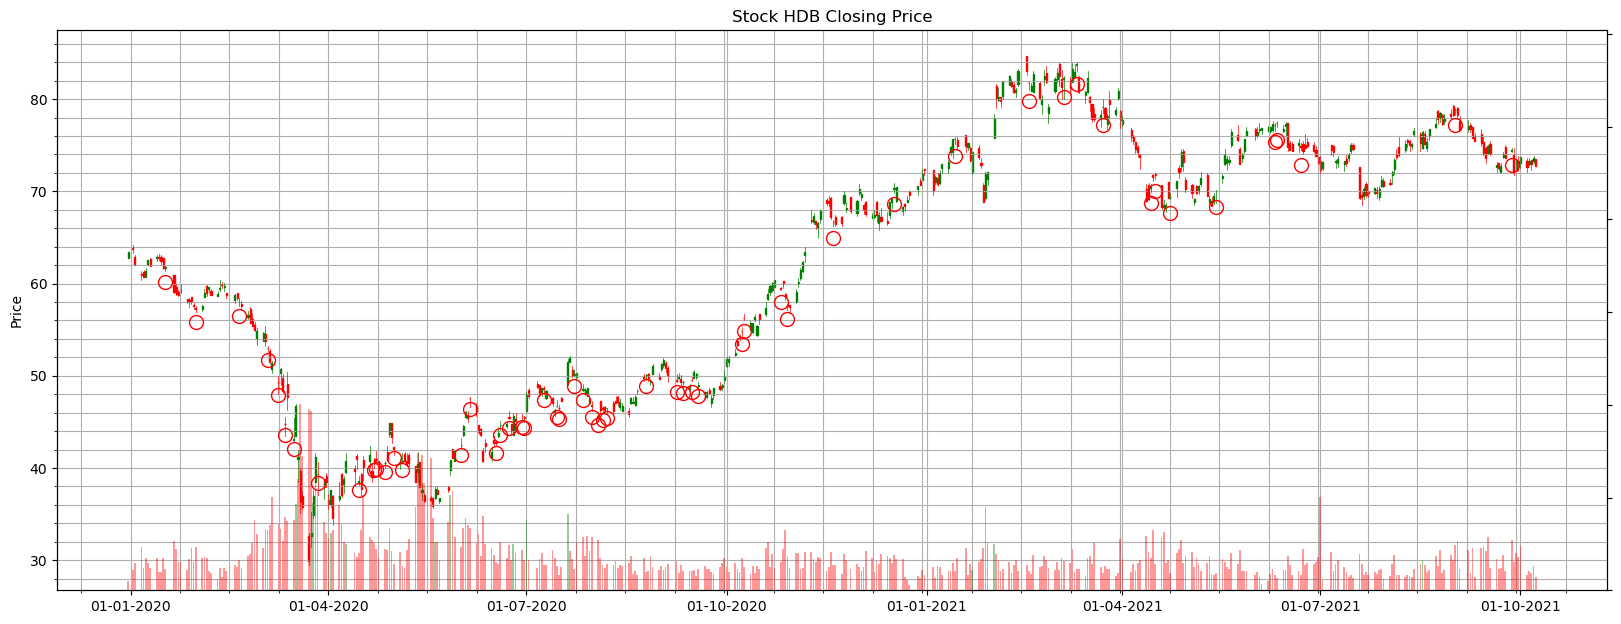

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['Doji'] !=0].index, df['Adj Close'].loc[df['Doji'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')